# Canciones más escuchadas de Spotify en 2024

## Set de datos
El set de datos (`MostStreamedSpotifySongs2024.csv`) consta de una serie de columnas que hacen referencia a las principales plataformas de música en streaming. En este caso, solo quiero explorar los datos de **Spotify**. Los datos que quiero visualizar y explorar son:

* Canciones por año
* Porcentaje de Canciones: Explícito vs No Explícito.
* Artista por año de las canciones mejor puntuadas.
* Canciones más escuchadas por año con y sin contenido explicito.
* Top 10 de los artistas más populares
* Top 10 de las canciones más escuchadas
* Top 10 de las canciones con mayor puntuación
* Canción mejor puntuada
* Canción con más Streams

In [3]:
# Importar librerías
# Manipulación de datos con DataFrames.
import pandas as pd
# Operaciones numéricas y manejo de arrays.
import numpy as np
# Creación de gráficos.
import matplotlib.pyplot as plt
# Visualización estadística avanzada.
import seaborn as sns
# Muestra gráficos en el notebook de Jupyter.
%matplotlib inline

In [4]:
# Lectura del archivo, la codificación es ISO-8859-1
file_path = ('MostStreamedSpotifySongs2024.csv')
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [5]:
# Vemos la tabla con todos los datos 
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


## Información de la tabla del dataset

El dataset esta compuesto por una serie de 29 columnas que recogen la información principal de las canciones y de las principales plataformas de músuca en streaming. 
En nuestro caso solo vamos a explorar la plataforma de **Spotify**

In [7]:
# Dimesiones del set de datos
print(f'Tamaño del set de datos: {data.shape}')

Tamaño del set de datos: (4600, 29)


## Observación del dataframe

In [9]:
# Lista de las variables categóricas y numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

### Comprobar datos nulos
Al observar que faltan datos en las columnas, lo siguiente es ver la cantidad de datos nulos y duplicados que hay.

In [11]:
# Suma de los nulos
data.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [12]:
# Suma de los registros duplicados
data.duplicated().sum()

2

## Limpieza de datos
Los siguientes procesos de limpieza son necesarios para conseguir un set de datos **íntegro**, listo para la fase de Análisis Exploratorio. 

### Filas duplicadas

In [15]:
# Encontrar todos los registros duplicados
duplicated_rows = data[data.duplicated()]

# Mostrar los registros duplicados
print(duplicated_rows)

                 Track        Album Name         Artist Release Date  \
2450  Tennessee Orange  Tennessee Orange  Megan Moroney     9/2/2022   
3450            Dembow            Dembow    Danny Ocean    12/8/2017   

              ISRC All Time Rank  Track Score Spotify Streams  \
2450  TCAGJ2289254         2,424         28.9     227,893,586   
3450  USWL11700269         3,441         23.3     579,189,526   

     Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
2450                 28,139             12,480,714  ...              34   
3450                 60,397             11,805,084  ...               9   

     Deezer Playlist Count Deezer Playlist Reach Amazon Playlist Count  \
2450                   5.0                 1,370                  49.0   
3450                  20.0                37,649                  12.0   

     Pandora Streams Pandora Track Stations Soundcloud Streams  Shazam Counts  \
2450      56,972,562                 26,968          1,33

In [16]:
# Eliminar filas duplicadas
print(f'Tamaño del set antes de eliminar las filas duplicadas: {data.shape}')
data.drop_duplicates(inplace=True) 
print(f'Tamaño del set después de eliminar las filas duplicadas: {data.shape}')

Tamaño del set antes de eliminar las filas duplicadas: (4600, 29)
Tamaño del set después de eliminar las filas duplicadas: (4598, 29)


### Filas nulas

#### Eliminar artistas nulos

In [19]:
# Filtrar las filas donde 'Artist' es nulo
null_artists = data[data['Artist'].isnull()]

In [20]:
# Mostrar los índices de las filas con valores nulos en 'Artist'
print("\nÍndices de los artistas que son nulos:")
print(null_artists.index.tolist())


Índices de los artistas que son nulos:
[311, 480, 1345, 1561, 3402]


In [21]:
# Eliminar artistas nulos
print(f"Número de artistas nulos antes de eliminarlos: {data['Artist'].isnull().sum()}")
data.dropna(subset=['Artist'], inplace=True)
print(f"Número de artistas nulos después de eliminarlos: {data['Artist'].isnull().sum()}")

Número de artistas nulos antes de eliminarlos: 5
Número de artistas nulos después de eliminarlos: 0


## Transformar los datos

### Convertir los Streams

In [24]:
# Eliminar comas y convertir a float (son muy grandes)
data['Spotify Streams'] = data['Spotify Streams'].str.replace(',', '').astype(float)

# Mostrar el dataFrame con streams convertidos a float
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,"30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,"28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,"54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,"269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,"7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


### Eliminar columnas 
El objetivo del análisis es explorar los datos de Spotify. Por ello, se eliminan las columnas correspondientes a otras plataformas de música

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4593 non-null   object 
 1   Album Name                  4593 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4593 non-null   object 
 4   ISRC                        4593 non-null   object 
 5   All Time Rank               4593 non-null   object 
 6   Track Score                 4593 non-null   float64
 7   Spotify Streams             4485 non-null   float64
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

In [27]:
# Eliminar columnas que no son consideradas para el objetivo principal
# Definir la lista de columnas a eliminar
columns_to_drop = [
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 
    'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 
    'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity'
]

# Eliminar las columnas
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [28]:
# Ver el dataframe con las columnas resultantes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   4593 non-null   object 
 1   Album Name              4593 non-null   object 
 2   Artist                  4593 non-null   object 
 3   Release Date            4593 non-null   object 
 4   ISRC                    4593 non-null   object 
 5   All Time Rank           4593 non-null   object 
 6   Track Score             4593 non-null   float64
 7   Spotify Streams         4485 non-null   float64
 8   Spotify Playlist Count  4528 non-null   object 
 9   Spotify Playlist Reach  4526 non-null   object 
 10  Spotify Popularity      3794 non-null   float64
 11  Explicit Track          4593 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 466.5+ KB


In [29]:
# Eliminar todas las registros que contienen al menos un valor nulo
data.dropna(inplace=True)

### Cantidad de registros en total

In [31]:
print(f'Cantidad de registros en total: {data.shape}')

Cantidad de registros en total: (3778, 12)


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3778 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   3778 non-null   object 
 1   Album Name              3778 non-null   object 
 2   Artist                  3778 non-null   object 
 3   Release Date            3778 non-null   object 
 4   ISRC                    3778 non-null   object 
 5   All Time Rank           3778 non-null   object 
 6   Track Score             3778 non-null   float64
 7   Spotify Streams         3778 non-null   float64
 8   Spotify Playlist Count  3778 non-null   object 
 9   Spotify Playlist Reach  3778 non-null   object 
 10  Spotify Popularity      3778 non-null   float64
 11  Explicit Track          3778 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 383.7+ KB


### Modificar columna Release Date y añadir nueva columna Year
Uno de los objetivos del análisis es clasificar los datos por año. Para lograr esto, crearé una columna nueva **Year**. Antes de añadir esta columna, primero cambiaré el tipo de dato de la columna **Release Date** a datetime. Este paso es necesario porque voy a extraer el año de **Release Date** y, para ello, el tipo de dato debe ser datetime.

In [34]:
# Convertir la columna 'Year' al tipo datetime
data['Release Date'] = pd.to_datetime(data['Release Date'], format='%m/%d/%Y')

# Extraer el año y crear una nueva columna 'Year'
data['Year'] = data['Release Date'].dt.year

data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,Explicit Track,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,"30,716","196,631,588",92.0,0,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,"28,113","174,597,137",92.0,1,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,"54,331","211,607,669",92.0,0,2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,"269,802","136,569,078",85.0,0,2023
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,"7,223","151,469,874",88.0,1,2024


In [35]:
# Datos de la columna Release date y de la nueva creada Year
print(data['Release Date'].head())
print(data[['Release Date', 'Year']].head())

# Verificar el tipo de dato de la columna 'fecha'
print(f"Tipo de datos de la columna Release date: {data['Release Date'].dtype}") 

0   2024-04-26
1   2024-05-04
2   2024-03-19
3   2023-01-12
4   2024-05-31
Name: Release Date, dtype: datetime64[ns]
  Release Date  Year
0   2024-04-26  2024
1   2024-05-04  2024
2   2024-03-19  2024
3   2023-01-12  2023
4   2024-05-31  2024
Tipo de datos de la columna Release date: datetime64[ns]


In [36]:
# Descripción de los datos numéricos del dataset.
data.describe()

,Release Date,Track Score,Spotify Streams,Spotify Popularity,Explicit Track,Year
count,3778,3778.000000,3.778000e+03,3778.000000,3778.000000,3778.000000
mean,2020-08-01 17:15:58.602434816,42.330148,4.935082e+08,63.712811,0.365537,2020.136316
min,1987-07-21 00:00:00,19.400000,2.030000e+03,1.000000,0.000000,1987.000000
25%,2018-12-29 00:00:00,23.500000,1.105366e+08,61.000000,0.000000,2018.250000
50%,2021-10-07 00:00:00,30.200000,3.053348e+08,67.000000,0.000000,2021.000000
75%,2023-03-24 00:00:00,44.975000,6.899928e+08,73.000000,1.000000,2023.000000
max,2024-06-10 00:00:00,725.400000,4.281469e+09,96.000000,1.000000,2024.000000
std,NaN,39.302975,5.399272e+08,15.866462,0.481644,3.703350


In [37]:
# Guardar el DataFrame en un archivo CSV
data.to_csv('NewMostStreamedSpotifySongs2024.csv', index=False)

# Visualización de datos

In [39]:
# Estos son los datos y sus tipos que se van a visualizar en las gráficas
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3778 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Track                   3778 non-null   object        
 1   Album Name              3778 non-null   object        
 2   Artist                  3778 non-null   object        
 3   Release Date            3778 non-null   datetime64[ns]
 4   ISRC                    3778 non-null   object        
 5   All Time Rank           3778 non-null   object        
 6   Track Score             3778 non-null   float64       
 7   Spotify Streams         3778 non-null   float64       
 8   Spotify Playlist Count  3778 non-null   object        
 9   Spotify Playlist Reach  3778 non-null   object        
 10  Spotify Popularity      3778 non-null   float64       
 11  Explicit Track          3778 non-null   int64         
 12  Year                    3778 non-null   int32        

### Canciones por año

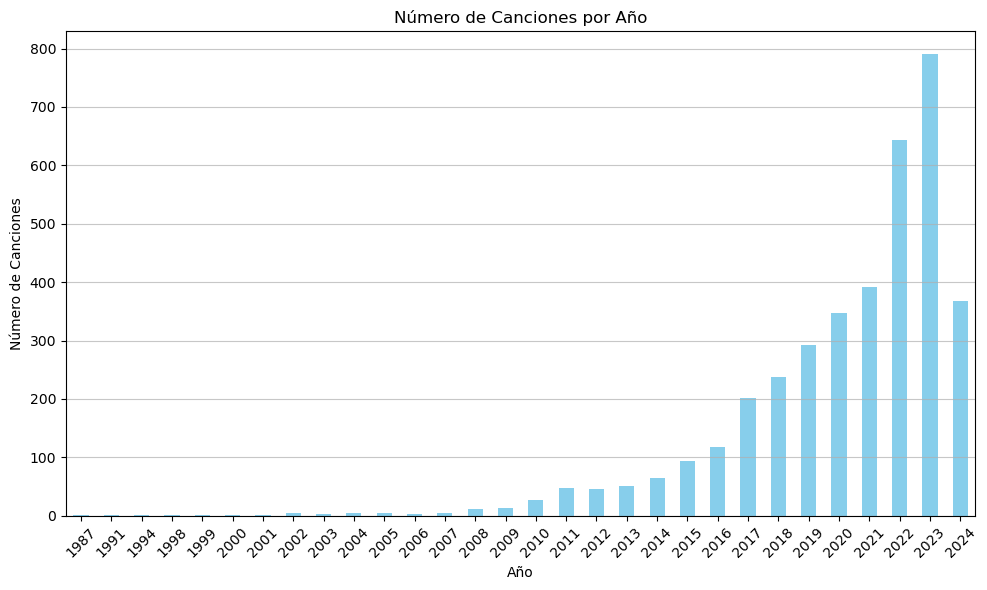

In [41]:
# Contar el número de canciones por año
songs_by_year = data['Year'].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 6))
songs_by_year.plot(kind='bar', color='skyblue')
plt.title('Número de Canciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Porcentaje de Canciones: Explícito vs No Explícito

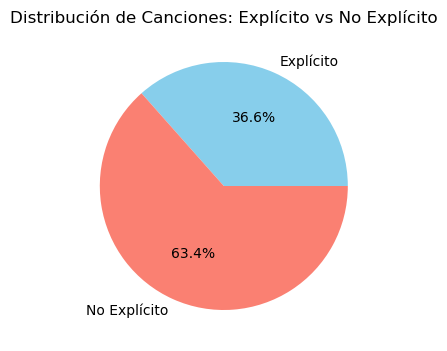

In [43]:
# Total de canciones con letra explícita
# Contar el número de ocurrencias de 0 y 1
value_counts = data['Explicit Track'].value_counts()

# Mapear los valores binarios a etiquetas explícitas
labels = ['Explícito', 'No Explícito']
sizes = [value_counts.get(1, 0), value_counts.get(0, 0)]

# Crear el gráfico circular
plt.figure(figsize=(4, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribución de Canciones: Explícito vs No Explícito')

# Mostrar el gráfico
plt.show()

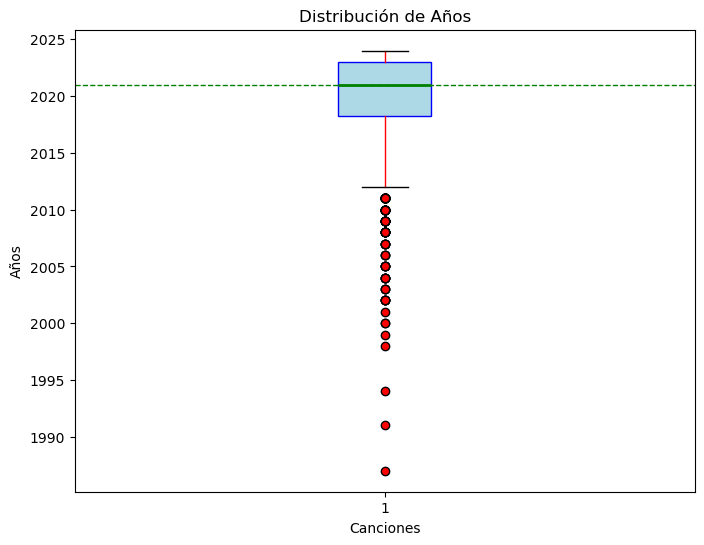

In [44]:
# Generar gráficas para el año
# Crear el boxplot
plt.figure(figsize=(8, 6))

# Crear el boxplot
plt.boxplot(data['Year'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='red'),
            capprops=dict(color='black'),
            medianprops=dict(color='green', linewidth=2),
            flierprops=dict(markerfacecolor='red', marker='o'))

# Configurar título y etiquetas
plt.title('Distribución de Años')
plt.xlabel('Canciones')
plt.ylabel('Años')

# Añadir una línea vertical en la mediana
median = data['Year'].median()
plt.axhline(median, color='green', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.show()

### Artista por año de las canciones mejor puntuadas

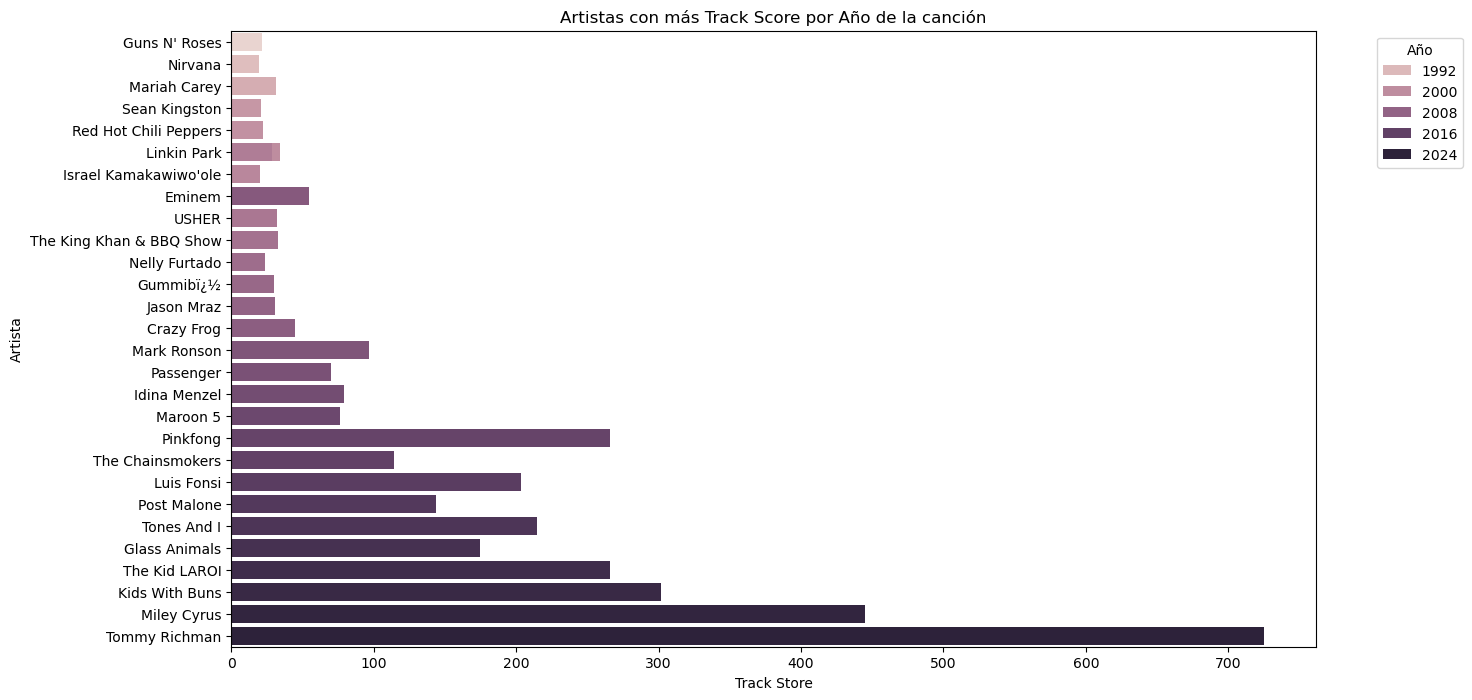

In [46]:
# Encontrar el artista con más "track store" por año
top_artists_per_year = data.loc[data.groupby('Year')['Track Score'].idxmax()]

# Crear una visualización
plt.figure(figsize=(14, 8))
sns.barplot(y='Artist', x='Track Score', hue='Year', data=top_artists_per_year, dodge=False)
plt.title('Artistas con más Track Score por Año de la canción')
plt.xlabel('Track Store')
plt.ylabel('Artista')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Canciones más escuchadas por año con y sin contenido explicito

In [48]:
# Filtrar canciones explícitas y no explícitas
explicit_data = data[data['Explicit Track'] == 1]
no_explicit_data = data[data['Explicit Track'] == 0]

# Agrupar por año con contenido explícito y sin contneido explícito
explicit_track = explicit_data.groupby('Year')['Track'].count().reset_index()
no_explicit_track = no_explicit_data.groupby('Year')['Track'].count().reset_index()

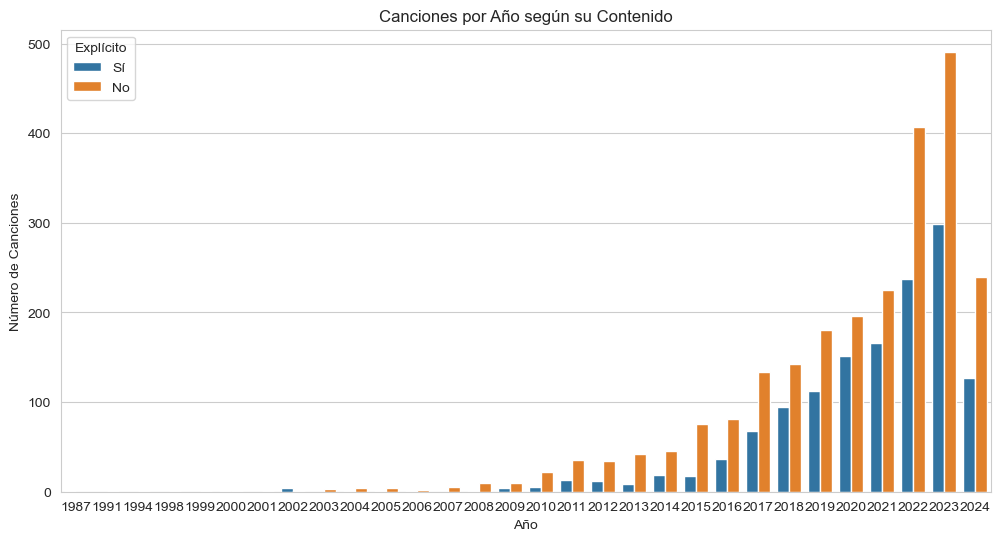

In [49]:
# Renombrar las columnas para unificar el DataFrame
explicit_track.rename(columns={'Track': 'Count'}, inplace=True)
explicit_track['Explícito'] = 'Sí'
no_explicit_track.rename(columns={'Track': 'Count'}, inplace=True)
no_explicit_track['Explícito'] = 'No'

# Unir los dos DataFrames
data_combined = pd.concat([explicit_track, no_explicit_track])

# Crear el gráfico usando Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras
sns.barplot(data=data_combined, x='Year', y='Count', hue='Explícito')

# Añadir título y etiquetas
plt.title('Canciones por Año según su Contenido')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')

# Mostrar el gráfico
plt.show()

### Canciones con y sin contenido explicito por año

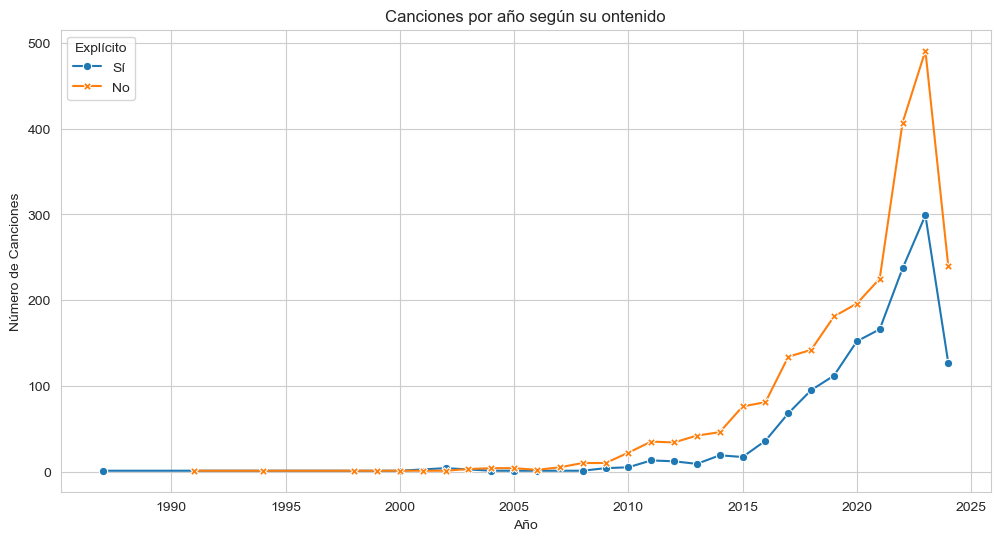

In [51]:
# Renombrar las columnas para unificar el DataFrame
explicit_track.rename(columns={'Track': 'Count'}, inplace=True)
explicit_track['Explícito'] = 'Sí'
no_explicit_track.rename(columns={'Track': 'Count'}, inplace=True)
no_explicit_track['Explícito'] = 'No'

# Unir los dos DataFrames
data_combined = pd.concat([explicit_track, no_explicit_track])

# Crear el gráfico usando Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=data_combined, x='Year', y='Count', hue='Explícito', style='Explícito', markers=True, dashes=False)

# Añadir título y etiquetas
plt.title('Canciones por año según su ontenido')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')

# Mostrar el gráfico
plt.show()

### Top 10 de los artistas más populares

In [53]:
# Identificar la canción más popular
popular_artist = data.groupby('Artist')['Spotify Popularity'].max().reset_index().sort_values(['Spotify Popularity'], ascending=False)

print(f"Artistas más populares:\n{popular_artist.head(10)}.")

Artistas más populares:
                 Artist  Spotify Popularity
1319          Shaboozey                96.0
1290  Sabrina Carpenter                95.0
195       Billie Eilish                92.0
507          FloyyMenor                92.0
114             Artemas                92.0
781      Kendrick Lamar                92.0
1467      Tommy Richman                92.0
1189        Post Malone                91.0
403                 Djo                90.0
852           Lay Bankz                90.0.


### Top 10 de los canciones más escuchadas

In [55]:
# Identificar la canción más popular
popular_song = data.groupby('Track')['Spotify Streams'].max().reset_index().sort_values(['Spotify Streams'], ascending=False)

print(f"Canciones más escuchadas:\n{popular_song.head(10)}.")

Canciones más escuchadas:
                                              Track  Spotify Streams
414                                 Blinding Lights     4.281469e+09
2679                                   Shape of You     3.909459e+09
2784                              Someone You Loved     3.427499e+09
2879  Sunflower - Spider-Man: Into the Spider-Verse     3.358704e+09
204                                       As It Was     3.301815e+09
2816                                        Starboy     3.291262e+09
2178                                      One Dance     3.192204e+09
2586                      STAY (with Justin Bieber)     3.107100e+09
716                                    Dance Monkey     3.071214e+09
368                                        Believer     3.006227e+09.


### Top 10 de las canciones con mayor puntuación

In [57]:
# Identificar la canción más popular
popular_score = data.groupby('Track')['Track Score'].max().reset_index().sort_values(['Track Score'], ascending=False)
print(f"Canciones mejor puntuadas:\n{popular_score.head(10)}.")

Canciones mejor puntuadas:
                                      Track  Track Score
1820                    MILLION DOLLAR BABY        725.4
2116                            Not Like Us        545.9
3548             i like the way you kiss me        538.4
1060                                Flowers        444.9
1331                                Houdini        423.3
1784                            Lovin On Me        410.1
356                        Beautiful Things        407.2
1129                              Gata Only        375.8
239              BAND4BAND (feat. Lil Baby)        330.6
1372  I Had Some Help (feat. Morgan Wallen)        322.1.


### Canción mejor puntuada

In [59]:
most_scored_song = data.loc[data['Track Score'].idxmax()]
print(f"La canción mejor puntuada es '{most_scored_song['Track']}' de {most_scored_song['Artist']} con {most_scored_song['Track Score']} streams.")

La canción mejor puntuada es 'MILLION DOLLAR BABY' de Tommy Richman con 725.4 streams.


### Canción con más Streams

In [61]:
# Identificar la fila con la canción más escuchada
most_listened_song = data.loc[data['Spotify Streams'].idxmax()]
print(f"La canción más streams es '{most_listened_song['Track']}' de {most_listened_song['Artist']} con {most_listened_song['Spotify Streams']} streams.")

La canción más streams es 'Blinding Lights' de The Weeknd con 4281468720.0 streams.


# Conclusiones

Después de explorar y visualizar los datos de las canciones más escuchadas de **Spotify** en 2024, he podido sacar las siguientes reflexiones que más me han parecido significativas.
En la gráfica de las *Canciones por año según su ontenido* se observa una elevación del número de canciones con contenido explícito a partir de 2015. La explicación de este aumento puede deberse a los siguientes factores:

* Aumento de nuevos artistas que emplean un uso del lenguaje más explícito.* 
Aparición o fusión de nuevos estilos musicales.* 
Reflejos de la sociedad en la letra de las canciones con motivos reivindicativos* .
Otros motivos.
Otro resultado que me ha resultado curioso es que la canción con más reproducciones es una de mis favoritas y no es la que tiene la mayor puntuación.ón.